In [21]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [71]:
df = pd.read_csv('data/processed_cricket_data.csv')

In [72]:
df.head()

,Batting team,Bowling team,Over Number,Runs Scored till that over,Wickets Taken till that over,Total Runs,Runs in Last 5 Overs,Wickets in Last 5 Overs
0,3,7,1,12,0,282,0.0,0.0
1,3,7,2,12,0,282,0.0,0.0
2,3,7,3,16,0,282,0.0,0.0
3,3,7,4,21,0,282,0.0,0.0
4,3,7,5,26,0,282,0.0,0.0


In [73]:
df.head()

,Batting team,Bowling team,Over Number,Runs Scored till that over,Wickets Taken till that over,Total Runs,Runs in Last 5 Overs,Wickets in Last 5 Overs
0,3,7,1,12,0,282,0.0,0.0
1,3,7,2,12,0,282,0.0,0.0
2,3,7,3,16,0,282,0.0,0.0
3,3,7,4,21,0,282,0.0,0.0
4,3,7,5,26,0,282,0.0,0.0


In [74]:
X = df.drop(columns=['Total Runs'],axis=1)

In [75]:
X.head()

,Batting team,Bowling team,Over Number,Runs Scored till that over,Wickets Taken till that over,Runs in Last 5 Overs,Wickets in Last 5 Overs
0,3,7,1,12,0,0.0,0.0
1,3,7,2,12,0,0.0,0.0
2,3,7,3,16,0,0.0,0.0
3,3,7,4,21,0,0.0,0.0
4,3,7,5,26,0,0.0,0.0


In [76]:
y = df['Total Runs']

In [77]:
y

0        282
1        282
2        282
3        282
4        282
        ... 
17098    215
17099    215
17100    215
17101    215
17102    215
Name: Total Runs, Length: 17103, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((13682, 7), (3421, 7))

In [79]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [80]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 52.8967
- Mean Absolute Error: 40.0424
- R2 Score: 0.4386
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 53.7643
- Mean Absolute Error: 40.1572
- R2 Score: 0.4364


Lasso
Model performance for Training set
- Root Mean Squared Error: 52.9115
- Mean Absolute Error: 40.0378
- R2 Score: 0.4382
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 53.8038
- Mean Absolute Error: 40.1838
- R2 Score: 0.4355


Ridge
Model performance for Training set
- Root Mean Squared Error: 52.8967
- Mean Absolute Error: 40.0424
- R2 Score: 0.4386
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 53.7643
- Mean Absolute Error: 40.1572
- R2 Score: 0.4364


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 43.8843
- Mean Absolute Error: 32.6113
- R2 Score: 0.6136
---------

In [81]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.720917
6,XGBRegressor,0.691684
7,CatBoosting Regressor,0.679643
4,Decision Tree,0.491634
0,Linear Regression,0.436352
2,Ridge,0.436352
1,Lasso,0.435524
3,K-Neighbors Regressor,0.420364
8,AdaBoost Regressor,0.352006


In [85]:
forest = RandomForestRegressor(max_depth=35)
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=35)

In [86]:
y_pred = forest.predict(X_test)

In [87]:
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 72.69


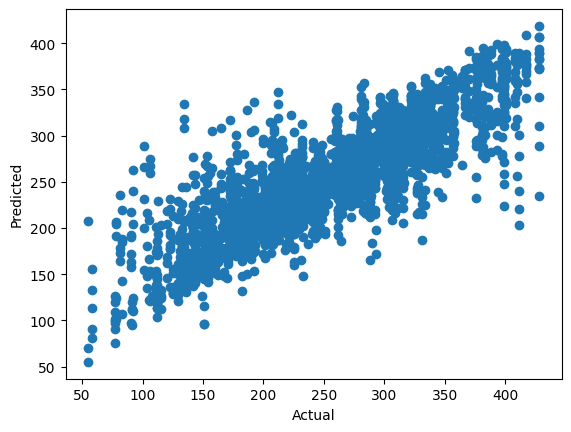

In [88]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

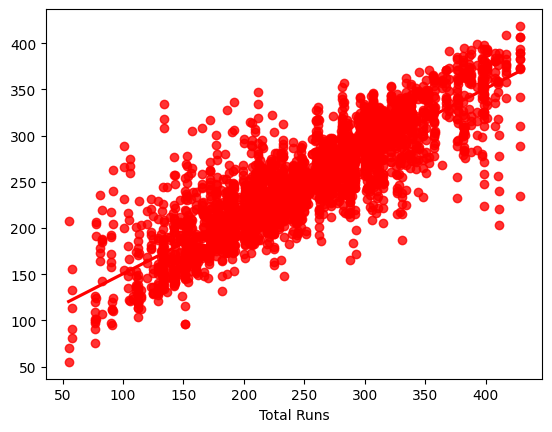

In [89]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [90]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
10044,260,275.90,-15.90
6679,285,293.26,-8.26
7585,186,193.74,-7.74
8847,310,294.10,15.90
7640,311,278.40,32.60
...,...,...,...
15359,174,206.21,-32.21
16372,169,170.14,-1.14
63,283,277.53,5.47
5146,280,279.48,0.52
